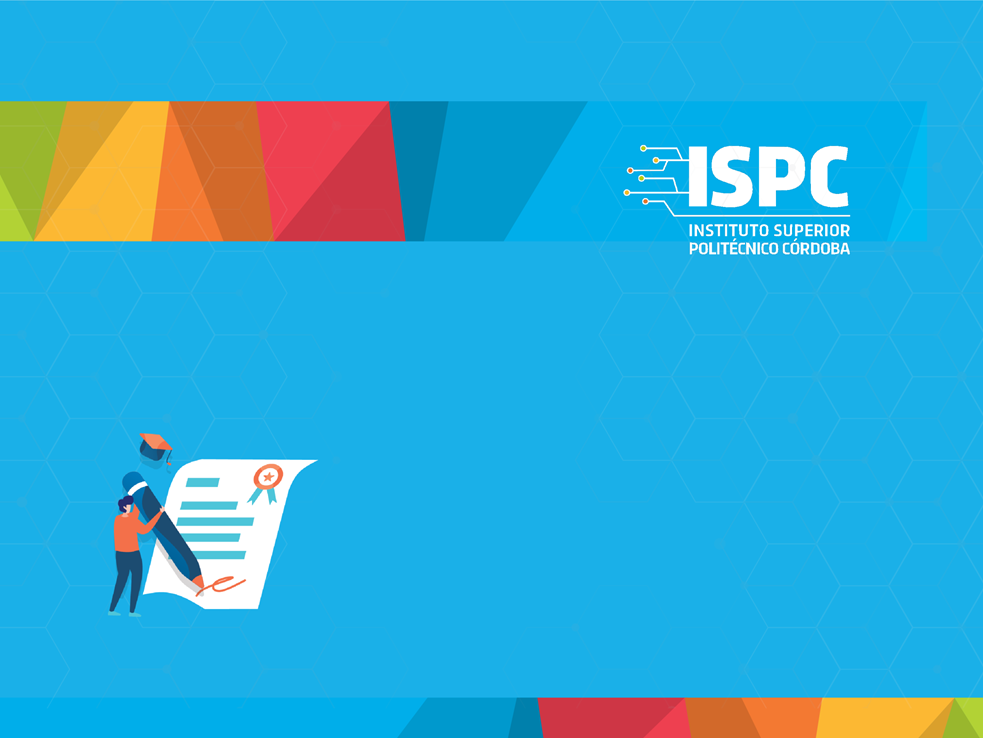

# 6ta Semana 23/06/2021- Algebra, aplicación en ML

https://www.datasource.ai/es/data-science-articles/una-guia-para-principiantes-sobre-la-regresion-lineal-en-python-con-scikit-learn

https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/

## Regresión Lineal – Teoría

La regresión lineal es una técnica paramétrica de machine learning. Con «paramétrica» queremos decir que incluso antes de mirar a los datos, ya sabemos cuántos parámetros (o coeficientes) vamos a necesitar.

En el caso que estemos usando una sola variable, x, sabemos que una línea necesita 2 parámetros. La fórmula para la regresión lineal con una sola variable x es:

$$y=wx+b$$

El aprendizaje consiste en encontrar cuáles son los mejores parámetros (coeficientes) para los datos que tengamos. Los mejores coeficientes serán los que minimicen alguna medida de error. 

Para la regresión lineal podemos usar el error cuadrático medio. También se puede resolver con el gradiente desdendete entre otras técnicas.

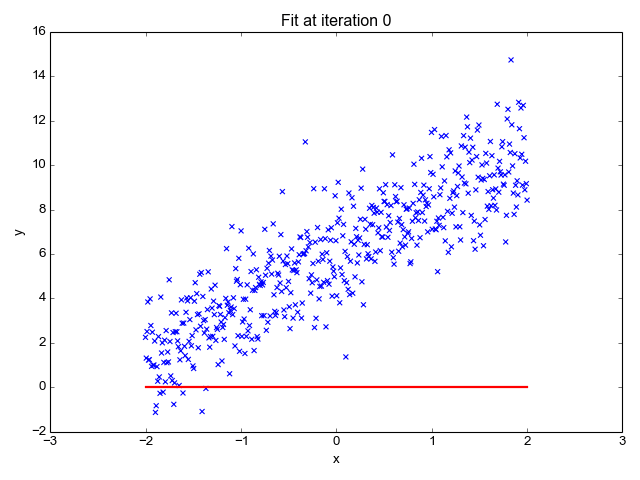

Cuando tengamos un dato con N variables, llamaremos al dato X. También tenemos que expandir los parámetros W para que cada parámetro vaya con una variable:

$$X=[x_0,x_1,x_2,...,x_N]$$

$$W=[w_0,w_1,w_2,...,w_N]$$

$x_0=1, w_0=b$

nos queda una expresión equivalente a la original. Podemos ver que:

$$y = b + wx = w_0 x_0 + w_1 x_1$$

 
Para el caso general, la ecuación lineal quedaría:

$$y = WX$$


usando el producto matricial. Si tienes la multiplicación de matrices un poco oxidada, la versión intuitiva sería:


$$y = w_0 x_0 + w_1 x_1 + w_2 x_2 + ... + w_N x_N$$


## Aprendizaje: El método de los mínimos cuadrados

El proceso de aprendizaje consiste en averiguar qué parámetros W minimizan el error cuadrático medio entre los resultados reales y los estimados.

El método de los mínimos cuadrados proporciona una solución analítica. Es decir, nos da una fórmula para obtener la mejor estimación posible de W para los datos de entrada y resultados que hemos proporcionado. 

La fórmula es la siguiente: (para la deducción ver los pdf adjuntos)

$$W = (X^T X)^{-1} X^T y$$


En la práctica hay librerías numéricas que calculan automáticamente la mejor estimación de W por nosotros. Ya veremos algún ejemplo práctico del cálculo de regresión lineal.

De momento, sólo quería indicar que dependiendo de la cantidad de datos y atributos, puede ser una operación costosa computacionalmente hablando. Fíjate que hay que transponer matrices, multiplicar matrices e invertir matrices. Todo ello muy costoso computacionalmente para grandes cantidades de datos.

## Como se deduce la fórmula de mínimos cuadrados?

https://www.docirs.cl/minimos_cuadrados_2.asp

http://wpd.ugr.es/~bioestad/bioestadistica/tema-3/

## Aproximación en Python

https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/OOP_in_ML/Class_MyLinearRegression.ipynb

In [ ]:
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        #APLICACIÓN DEL METODO DE MINIMOS CUADRADOS
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

https://pybonacci.org/2016/02/22/el-producto-de-matrices-y-el-nuevo-operador/

In [1]:
import numpy as np

In [2]:
X=np.matrix([[1,1,1,1],[2104,1416,1534,852],[5,3,3,2],[1,2,2,1],[45,41,30,36]]).T
y=np.matrix([460,232,315,178])

In [4]:
XT = X.T
XT

matrix([[   1,    1,    1,    1],
        [2104, 1416, 1534,  852],
        [   5,    3,    3,    2],
        [   1,    2,    2,    1],
        [  45,   41,   30,   36]])

In [8]:
np.linalg.inv(XT @ X) @ XT @ y.T

matrix([[-2.21172188e+04],
        [ 4.38305664e+00],
        [ 3.40787500e+03],
        [-1.46865625e+03],
        [ 5.46425781e+01]])

In [9]:
(np.linalg.inv(X @ X.T) @ X).T @ y.T

matrix([[182.27200271],
        [  0.34497235],
        [-38.43393186],
        [-82.90625956],
        [ -3.84484213]])

In [10]:
X=np.matrix([[1,2104,5,1,45],[1,1416,3,2,40],[1,1534,3,2,30],[1,852,2,1,36]])
y=np.matrix([[460],[232],[315],[178]])

XT=X.T
XTX=XT@X

inv=np.linalg.pinv(XTX)

theta=(inv@XT)@y
print(theta)

[[188.40031946]
 [  0.3866255 ]
 [-56.13824954]
 [-92.9672536 ]
 [ -3.73781915]]


## Introducción al Algebra lineal

Una de las herramientas matemáticas más utilizadas en [machine learning](http://es.wikipedia.org/wiki/Machine_learning) y [data mining](http://es.wikipedia.org/wiki/Miner%C3%ADa_de_datos) es el [Álgebra lineal](http://es.wikipedia.org/wiki/%C3%81lgebra_lineal); por tanto, si queremos incursionar en el fascinante mundo del aprendizaje automático y el análisis de datos es importante reforzar los conceptos que forman parte de sus cimientos. 

El [Álgebra lineal](http://es.wikipedia.org/wiki/%C3%81lgebra_lineal) es una rama de las [matemáticas](http://es.wikipedia.org/wiki/Matem%C3%A1ticas) que es sumamente utilizada en el estudio de una gran variedad de ciencias, como ser, ingeniería, finanzas, investigación operativa, entre otras. Es una extensión del [álgebra](http://es.wikipedia.org/wiki/%C3%81lgebra) que aprendemos en la escuela secundaria, hacia un mayor número de dimensiones; en lugar de trabajar con incógnitas a nivel de <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> comenzamos a trabajar con <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a> y [vectores](http://es.wikipedia.org/wiki/Vector).  

El estudio del [Álgebra lineal](http://es.wikipedia.org/wiki/%C3%81lgebra_lineal) implica trabajar con varios objetos matemáticos, como ser:

* **Los <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">Escalares</a>**: Un *escalar* es un solo número, en contraste con la mayoría de los otros objetos estudiados en [Álgebra lineal](http://es.wikipedia.org/wiki/%C3%81lgebra_lineal), que son generalmente una colección de múltiples números.

* **Los [Vectores](http://es.wikipedia.org/wiki/Vector)**:Un *vector* es una serie de números. Los números tienen una orden preestablecido, y podemos identificar cada número individual por su índice en ese orden. Podemos pensar en los  *vectores* como la identificación de puntos en el espacio, con cada elemento que da la coordenada a lo largo de un eje diferente. Existen dos tipos de *vectores*, los *vectores de fila* y los *vectores de columna*. Podemos representarlos de la siguiente manera, dónde *f* es un vector de fila y *c* es un vector de columna:
$$f=\begin{bmatrix}0&1&-1\end{bmatrix} ;       c=\begin{bmatrix}0\\1\\-1\end{bmatrix}$$

* **Las <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">Matrices</a>**: Una *matriz* es un arreglo bidimensional de números (llamados entradas de la matriz) ordenados en filas (o renglones) y columnas, donde una fila es cada una de las líneas horizontales de la matriz y una columna es cada una de las líneas verticales. En una *matriz* cada elemento puede ser identificado utilizando dos índices, uno para la fila y otro para la columna en que se encuentra. Las podemos representar de la siguiente manera, *A* es una matriz de 3x2.
$$A=\begin{bmatrix}0 & 1& \\-1 & 2 \\ -2 & 3\end{bmatrix}$$

* **Los [Tensores](http://es.wikipedia.org/wiki/C%C3%A1lculo_tensorial)**:En algunos casos necesitaremos una matriz con más de dos ejes. En general, una serie de números dispuestos en una cuadrícula regular con un número variable de ejes es conocido como un *tensor*.

Sobre estos objetos podemos realizar las operaciones matemáticas básicas, como ser [adición](http://es.wikipedia.org/wiki/Adici%C3%B3n), [multiplicación](http://es.wikipedia.org/wiki/Multiplicaci%C3%B3n), [sustracción](http://es.wikipedia.org/wiki/Sustracci%C3%B3n) y <a href="http://es.wikipedia.org/wiki/Divisi%C3%B3n_(matem%C3%A1tica)" >división</a>, es decir que vamos a poder sumar [vectores](http://es.wikipedia.org/wiki/Vector) con <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a>, multiplicar <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> a [vectores](http://es.wikipedia.org/wiki/Vector) y demás.

## Librerías de Python para álgebra lineal

Los principales módulos que [Python](http://python.org/) nos ofrece para realizar operaciones de [Álgebra lineal](http://es.wikipedia.org/wiki/%C3%81lgebra_lineal) son los siguientes:

* **[Numpy](http://www.numpy.org/)**: El popular paquete matemático de [Python](http://python.org/), nos va a permitir crear *[vectores](http://es.wikipedia.org/wiki/Vector)*, *<a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a>* y *[tensores](http://es.wikipedia.org/wiki/C%C3%A1lculo_tensorial)* con suma facilidad.

* **[numpy.linalg](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html)**: Este es un submodulo dentro de [Numpy](http://www.numpy.org/) con un gran número de funciones para resolver ecuaciones de [Álgebra lineal](http://es.wikipedia.org/wiki/%C3%81lgebra_lineal).

* **[scipy.linalg](http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)**: Este submodulo del paquete científico [Scipy](http://docs.scipy.org/doc/scipy/reference/index.html) es muy similar al anterior, pero con algunas más funciones y optimaciones.

* **[Sympy](http://www.sympy.org/es/)**: Esta librería nos permite trabajar con matemática simbólica, convierte a [Python](http://python.org/) en un [sistema algebraico computacional](http://es.wikipedia.org/wiki/Sistema_algebraico_computacional). Nos va a permitir trabajar con ecuaciones y fórmulas simbólicamente, en lugar de numéricamente.

* **[CVXOPT](http://cvxopt.org/)**: Este módulo nos permite resolver problemas de optimizaciones de [programación lineal](http://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal). 

* **[PuLP](http://pythonhosted.org//PuLP/)**: Esta librería nos permite crear modelos de [programación lineal](http://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal) en forma muy sencilla con [Python](http://python.org/).

## Operaciones básicas

### Vectores

Un *[vector](http://es.wikipedia.org/wiki/Vector)* de largo `n` es una secuencia (o *array*, o *tupla*) de `n` números. La solemos escribir como x=(x1,...,xn) o x=[x1,...,xn]

En [Python](http://python.org/), un *[vector](http://es.wikipedia.org/wiki/Vector)* puede ser representado con una simple *lista*, o con un *array* de [Numpy](http://www.numpy.org/); siendo preferible utilizar esta última opción.

In [2]:
# Vector como lista de Python
v1 = [2, 4, 6]
v1

[2, 4, 6]

In [2]:
# Vectores con numpy
import numpy as np

v2 = np.ones(3) # vector de solo unos.
v2

array([1., 1., 1.])

In [3]:
v3 = np.array([1, 3, 5]) # pasando una lista a las arrays de numpy
v3

array([1, 3, 5])

In [4]:
v4 = np.arange(1, 8) # utilizando la funcion arange de numpy
v4

array([1, 2, 3, 4, 5, 6, 7])

### Representación gráfica

Tradicionalmente, los *[vectores](http://es.wikipedia.org/wiki/Vector)* son representados visualmente como flechas que parten desde el origen hacia un punto.

Por ejemplo, si quisiéramos representar graficamente a los vectores v1=[2, 4], v2=[-3, 3] y v3=[-4, -3.5], podríamos hacerlo de la siguiente manera.

In [5]:
import matplotlib.pyplot as plt
from warnings import filterwarnings

%matplotlib inline
filterwarnings('ignore') # Ignorar warnings

In [6]:
def move_spines():
    """Crea la figura de pyplot y los ejes. Mueve las lineas de la izquierda y de abajo
    para que se intersecten con el origen. Elimina las lineas de la derecha y la de arriba.
    Devuelve los ejes."""
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")
    
    for spine in ["right", "top"]:
        ax.spines[spine].set_color("none")
    
    return ax

def vect_fig(): 
    """Genera el grafico de los vectores en el plano"""
    ax = move_spines()
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid()
    vecs = [[2, 4], [-3, 3], [-4, -3.5]] # lista de vectores
    for v in vecs:
        ax.annotate(" ", xy=v, xytext=[0, 0],
                   arrowprops=dict(facecolor="blue",
                                  shrink=0,
                                  alpha=0.7,
                                  width=0.5))
        ax.text(1.1 * v[0], 1.1 * v[1], v)

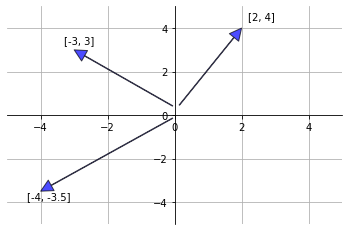

In [7]:
vect_fig() # crea el gráfico

### Operaciones con vectores

Las operaciones más comunes que utilizamos cuando trabajamos con *[vectores](http://es.wikipedia.org/wiki/Vector)* son la *suma*, la *resta* y la *multiplicación por <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>*.

Cuando *sumamos* dos *[vectores](http://es.wikipedia.org/wiki/Vector)*, vamos sumando elemento por elemento de cada
*[vector](http://es.wikipedia.org/wiki/Vector)*.

$$ \begin{split}x + y
=
\left[
\begin{array}{c}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{array}
\right]
+
\left[
\begin{array}{c}
     y_1 \\
     y_2 \\
    \vdots \\
     y_n
\end{array}
\right]
:=
\left[
\begin{array}{c}
    x_1 + y_1 \\
    x_2 + y_2 \\
    \vdots \\
    x_n + y_n
\end{array}
\right]\end{split}$$

De forma similar funciona la operación de resta.

$$ \begin{split}x - y
=
\left[
\begin{array}{c}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{array}
\right]
-
\left[
\begin{array}{c}
     y_1 \\
     y_2 \\
    \vdots \\
     y_n
\end{array}
\right]
:=
\left[
\begin{array}{c}
    x_1 - y_1 \\
    x_2 - y_2 \\
    \vdots \\
    x_n - y_n
\end{array}
\right]\end{split}$$

La *multiplicación por <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>* es una operación que toma a un número $\gamma$, y a un *[vector](http://es.wikipedia.org/wiki/Vector)* $x$ y produce un nuevo *[vector](http://es.wikipedia.org/wiki/Vector)* donde cada elemento del vector $x$ es multiplicado por el número $\gamma$.

$$\begin{split}\gamma x
:=
\left[
\begin{array}{c}
    \gamma x_1 \\
    \gamma x_2 \\
    \vdots \\
    \gamma x_n
\end{array}
\right]\end{split}$$

En [Python](http://python.org/) podríamos realizar estas operaciones en forma muy sencilla:

In [8]:
# Ejemplo en Python
x = np.arange(1, 5)
y = np.array([2, 4, 6, 8])
x, y

(array([1, 2, 3, 4]), array([2, 4, 6, 8]))

In [9]:
# sumando dos vectores numpy
x + y

array([ 3,  6,  9, 12])

In [10]:
# restando dos vectores
x - y

array([-1, -2, -3, -4])

In [11]:
# multiplicando por un escalar
x * 2

array([2, 4, 6, 8])

In [12]:
y * 3

array([ 6, 12, 18, 24])

#### Producto escalar o interior

El [producto escalar](https://es.wikipedia.org/wiki/Producto_escalar) de dos *[vectores](http://es.wikipedia.org/wiki/Vector)* se define como la suma de los productos de sus elementos, suele representarse matemáticamente como < x, y > o x'y, donde x e y son dos vectores.

$$< x, y > := \sum_{i=1}^n x_i y_i$$

Dos *[vectores](http://es.wikipedia.org/wiki/Vector)* son <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonales</a> o perpendiculares cuando forman ángulo recto entre sí. Si el producto escalar de dos vectores es cero, ambos vectores son <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonales</a>.

Adicionalmente, todo [producto escalar](https://es.wikipedia.org/wiki/Producto_escalar) induce una [norma](https://es.wikipedia.org/wiki/Norma_vectorial) sobre el espacio en el que está definido, de la siguiente manera:

$$\| x \| := \sqrt{< x, x>} := \left( \sum_{i=1}^n x_i^2 \right)^{1/2}$$

En [Python](http://python.org/) lo podemos calcular de la siguiente forma:

In [13]:
# Calculando el producto escalar de los vectores x e y
np.dot(x, y)

60

In [14]:
# o lo que es lo mismo, que:
sum(x * y)

60

In [15]:
# Calculando la norma del vector X
np.linalg.norm(x)

5.477225575051661

In [16]:
# otra forma de calcular la norma de x
np.sqrt(np.dot(x, x))

5.477225575051661

In [17]:
# vectores ortogonales
v1 = np.array([3, 4])
v2 = np.array([4, -3])

np.dot(v1, v2)

0

### Matrices

Las <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a> son una forma clara y sencilla de organizar los datos para su uso en operaciones lineales.

Una <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> `n × k` es una agrupación rectangular de números con n filas y k columnas; se representa de la siguiente forma:

$$\begin{split}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1k} \\
    a_{21} & a_{22} & \cdots & a_{2k} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{array}
\right]\end{split}$$

En la <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> A, el símbolo $a_{nk}$ representa el elemento  n-ésimo de la fila en la k-ésima columna. La <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> A también puede ser llamada un *[vector](http://es.wikipedia.org/wiki/Vector)* si cualquiera de n o k son iguales a 1. En el caso de n=1, A se llama un *[vector](http://es.wikipedia.org/wiki/Vector) fila*, mientras que en el caso de k=1 se denomina un *[vector](http://es.wikipedia.org/wiki/Vector) columna*.

Las <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a> se utilizan para múltiples aplicaciones y sirven, en particular, para representar los coeficientes de los sistemas de ecuaciones lineales o para representar transformaciones lineales dada una base. Pueden sumarse, multiplicarse y descomponerse de varias formas.

### Operaciones con matrices

Al igual que con los *[vectores](http://es.wikipedia.org/wiki/Vector)*, que no son más que un caso particular, las <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a> se pueden *sumar*, *restar* y la *multiplicar por <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>*.

Multiplicacion por escalares:
$$\begin{split}\gamma A
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk} \\
\end{array}
\right]
:=
\left[
\begin{array}{ccc}
    \gamma a_{11} & \cdots & \gamma a_{1k} \\
    \vdots & \vdots & \vdots \\
    \gamma a_{n1} & \cdots & \gamma a_{nk} \\
\end{array}
\right]\end{split}$$

Suma de matrices: $$\begin{split}A + B =
\left[
\begin{array}{ccc}
    a_{11} & \cdots & a_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} & \cdots & a_{nk} \\
\end{array}
\right]
+
\left[
\begin{array}{ccc}
    b_{11} & \cdots & b_{1k} \\
    \vdots & \vdots & \vdots \\
    b_{n1} & \cdots & b_{nk} \\
\end{array}
\right]
:=
\left[
\begin{array}{ccc}
    a_{11} + b_{11} &  \cdots & a_{1k} + b_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} + b_{n1} &  \cdots & a_{nk} + b_{nk} \\
\end{array}
\right]\end{split}$$

Resta de matrices: $$\begin{split}A - B =
\left[
\begin{array}{ccc}
    a_{11} & \cdots & a_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} & \cdots & a_{nk} \\
\end{array}
\right]-
\left[
\begin{array}{ccc}
    b_{11} & \cdots & b_{1k} \\
    \vdots & \vdots & \vdots \\
    b_{n1} & \cdots & b_{nk} \\
\end{array}
\right]
:=
\left[
\begin{array}{ccc}
    a_{11} - b_{11} &  \cdots & a_{1k} - b_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} - b_{n1} &  \cdots & a_{nk} - b_{nk} \\
\end{array}
\right]\end{split}$$

Para los casos de suma y resta, hay que tener en cuenta que solo se pueden sumar o restar <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a> que tengan las mismas dimensiones, es decir que si tengo una <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> A de dimensión 3x2 (3 filas y 2 columnas) solo voy a poder sumar o restar la <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> B si esta también tiene 3 filas y 2 columnas.

In [18]:
# Ejemplo en Python
A = np.array([[1, 3, 2],
              [1, 0, 0],
              [1, 2, 2]])

B = np.array([[1, 0, 5],
              [7, 5, 0],
              [2, 1, 1]])

In [19]:
# suma de las matrices A y B
A + B

array([[2, 3, 7],
       [8, 5, 0],
       [3, 3, 3]])

In [20]:
# resta de matrices
A - B

array([[ 0,  3, -3],
       [-6, -5,  0],
       [-1,  1,  1]])

In [21]:
# multiplicando matrices por escalares
A * 2

array([[2, 6, 4],
       [2, 0, 0],
       [2, 4, 4]])

In [22]:
B * 3

array([[ 3,  0, 15],
       [21, 15,  0],
       [ 6,  3,  3]])

In [23]:
# ver la dimension de una matriz
A.shape

(3, 3)

In [24]:
# ver cantidad de elementos de una matriz
A.size

9

#### Multiplicacion o Producto de matrices

La regla para la [multiplicación de matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices) generaliza la idea del [producto interior](https://es.wikipedia.org/wiki/Producto_escalar) que vimos con los [vectores](http://es.wikipedia.org/wiki/Vector); y esta diseñada para facilitar las operaciones lineales básicas.
Cuando [multiplicamos matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices), el número de columnas de la primera <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> debe ser igual al número de filas de la segunda <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>; y el resultado de esta multiplicación va a tener el mismo número de filas que la primer <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> y el número de la columnas de la segunda <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>. Es decir, que si yo tengo una <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> A de dimensión 3x4 y la multiplico por una <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> B de dimensión 4x2, el resultado va a ser una <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> C de dimensión 3x2.

Algo a tener en cuenta a la hora de [multiplicar matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices) es que la propiedad [connmutativa](https://es.wikipedia.org/wiki/Conmutatividad) no se cumple. AxB no es lo mismo que BxA.

Veamos los ejemplos en [Python](http://python.org/).

In [25]:
import numpy as np
# Ejemplo multiplicación de matrices
A = np.arange(1, 13).reshape(3, 4) #matriz de dimension 3x4
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [26]:
B = np.arange(8).reshape(4,2) #matriz de dimension 4x2
B

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [27]:
# Multiplicando A x B
A.dot(B) #resulta en una matriz de dimension 3x2

array([[ 40,  50],
       [ 88, 114],
       [136, 178]])

In [28]:
# Multiplicando B x A
B.dot(A)

ValueError: shapes (4,2) and (3,4) not aligned: 2 (dim 1) != 3 (dim 0)

Este ultimo ejemplo vemos que la propiedad conmutativa no se cumple, es más, [Python](http://python.org/) nos arroja un error, ya que el número de columnas de B no coincide con el número de filas de A, por lo que ni siquiera se puede realizar la multiplicación de B x A.

Para una explicación más detallada del proceso de [multiplicación de matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices), pueden consultar el siguiente [tutorial](http://www.mathsisfun.com/algebra/matrix-multiplying.html).

#### La matriz identidad,  la matriz inversa,  la matrix transpuesta y el determinante

La [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) es el elemento neutro en la [multiplicación de matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices), es el equivalente al número 1. Cualquier matriz multiplicada por la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) nos da como resultado la misma matriz. La [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) es una [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada) (tiene siempre el mismo número de filas que de columnas); y su diagonal principal se compone de todos elementos 1 y el resto de los elementos se completan con 0. Suele representase con la letra I

Por ejemplo la matriz identidad de 3x3 sería la siguiente:

$$I=\begin{bmatrix}1 & 0 & 0 & \\0 & 1 & 0\\ 0 & 0 & 1\end{bmatrix}$$

Ahora que conocemos el concepto de la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad), podemos llegar al concepto de la [matriz inversa](https://es.wikipedia.org/wiki/Matriz_invertible). Si tenemos una matriz A, la [matriz inversa](https://es.wikipedia.org/wiki/Matriz_invertible) de A, que se representa como $A^{-1}$ es aquella [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada) que hace que la multiplicación $A$x$A^{-1}$ sea igual a la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) I. Es decir que es la <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> recíproca de A.

$$A × A^{-1} = A^{-1} × A = I$$

Tener en cuenta que esta [matriz inversa](https://es.wikipedia.org/wiki/Matriz_invertible) en muchos casos puede no existir.En este caso se dice que la matriz es singular o degenerada. Una matriz es singular si y solo si su <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es nulo.

El <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es un número especial que puede calcularse sobre las [matrices cuadradas](https://es.wikipedia.org/wiki/Matriz_cuadrada). Se calcula como la suma de los productos de las diagonales de la matriz en una dirección menos la suma de los productos de las diagonales en la otra dirección. Se represente con el símbolo |A|.

$$A=\begin{bmatrix}a_{11} & a_{12} & a_{13} & \\a_{21} & a_{22} & a_{23} & \\ a_{31} & a_{32} & a_{33} & \end{bmatrix}$$

$$|A| = 
     (a_{11} a_{22} a_{33} 
   + a_{12} a_{23} a_{31} 
   + a_{13} a_{21} a_{32} )
   - (a_{31} a_{22} a_{13} 
   + a_{32} a_{23} a_{11} 
   + a_{33} a_{21} a_{12})
 $$

Por último, la [matriz transpuesta](http://es.wikipedia.org/wiki/Matriz_transpuesta) es aquella en que las filas se transforman en columnas y las columnas en filas. Se representa con el símbolo $A^\intercal$

$$\begin{bmatrix}a & b & \\c & d & \\ e & f & \end{bmatrix}^T:=\begin{bmatrix}a & c & e &\\b & d & f & \end{bmatrix}$$

Ejemplos en [Python](http://python.org/):

In [29]:
# Creando una matriz identidad de 2x2
I = np.eye(2)
I

array([[ 1.,  0.],
       [ 0.,  1.]])

In [30]:
# Multiplicar una matriz por la identidad nos da la misma matriz
A = np.array([[4, 7],
              [2, 6]])
A

array([[4, 7],
       [2, 6]])

In [31]:
A.dot(I) # AxI = A

array([[ 4.,  7.],
       [ 2.,  6.]])

In [32]:
# Calculando el determinante de la matriz A
np.linalg.det(A)

10.000000000000002

In [33]:
# Calculando la inversa de A.
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.6, -0.7],
       [-0.2,  0.4]])

In [34]:
# A x A_inv nos da como resultado I.
A.dot(A_inv)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [35]:
# Trasponiendo una matriz
A = np.arange(6).reshape(3, 2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [36]:
np.transpose(A)

array([[0, 2, 4],
       [1, 3, 5]])

### Sistemas de ecuaciones lineales

Una de las principales aplicaciones del [Álgebra lineal](http://es.wikipedia.org/wiki/%C3%81lgebra_lineal) consiste en resolver problemas de sistemas de ecuaciones lineales.

Una [ecuación lineal](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_primer_grado) es una ecuación que solo involucra sumas y restas de una variable o mas variables a la primera potencia. Es la ecuación de la línea recta.Cuando nuestro problema esta representado por más de una [ecuación lineal](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_primer_grado), hablamos de un [sistema de ecuaciones lineales](http://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales). Por ejemplo, podríamos tener un sistema de dos ecuaciones con dos incógnitas como el siguiente:

$$ x - 2y = 1$$ 
$$3x + 2y = 11$$

La idea es encontrar el valor de $x$ e $y$ que resuelva ambas ecuaciones. Una forma en que podemos hacer esto, puede ser representando graficamente ambas rectas y buscar los puntos en que las rectas se cruzan. 

En [Python](http://python.org/) esto se puede hacer en forma muy sencilla con la ayuda de [matplotlib](http://matplotlib.org/).

(0.0, 5.0, 0, 6.0)

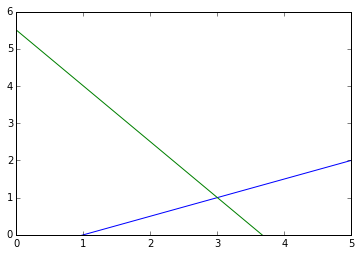

In [37]:
# graficando el sistema de ecuaciones.
x_vals = np.linspace(0, 5, 50) # crea 50 valores entre 0 y 5
plt.plot(x_vals, (1 - x_vals)/-2) # grafica x - 2y = 1
plt.plot(x_vals, (11 - (3*x_vals))/2) # grafica 3x + 2y = 11
plt.axis(ymin = 0)

Luego de haber graficado las funciones, podemos ver que ambas rectas se cruzan en el punto (3, 1), es decir que la solución de nuestro sistema sería $x=3$ e $y=1$. En este caso, al tratarse de un sistema simple y con solo dos incógnitas, la solución gráfica puede ser de utilidad, pero para sistemas más complicados se necesita una solución numérica, es aquí donde entran a jugar las <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a>.

Ese mismo sistema se podría representar como una ecuación matricial de la siguiente forma:

$$\begin{bmatrix}1 & -2 & \\3 & 2 & \end{bmatrix} \begin{bmatrix}x & \\y & \end{bmatrix} = \begin{bmatrix}1 & \\11 & \end{bmatrix}$$

Lo que es lo mismo que decir que la <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> A por la <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $x$ nos da como resultado el [vector](http://es.wikipedia.org/wiki/Vector) b.

$$ Ax = b$$

En este caso, ya sabemos el resultado de $x$, por lo que podemos comprobar que nuestra solución es correcta realizando la [multiplicación de matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices).

In [38]:
# Comprobando la solucion con la multiplicación de matrices.
A = np.array([[1., -2.],
              [3., 2.]])
x = np.array([[3.],[1.]])

A.dot(x)

array([[  1.],
       [ 11.]])

Para resolver en forma numérica los [sistema de ecuaciones](http://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales), existen varios métodos:

* **El método de sustitución**: El cual consiste en despejar en una de las ecuaciones cualquier incógnita, preferiblemente la que tenga menor coeficiente y a continuación sustituirla en otra ecuación por su valor.

* **El método de igualacion**: El cual se puede entender como un caso particular del método de sustitución en el que se despeja la misma incógnita en dos ecuaciones y a continuación se igualan entre sí la parte derecha de ambas ecuaciones.

* **El método de reduccion**: El procedimiento de este método consiste en transformar una de las ecuaciones (generalmente, mediante productos), de manera que obtengamos dos ecuaciones en la que una misma incógnita aparezca con el mismo coeficiente y distinto signo. A continuación, se suman ambas ecuaciones produciéndose así la reducción o cancelación de dicha incógnita, obteniendo una ecuación con una sola incógnita, donde el método de resolución es simple.

* **El método gráfico**: Que consiste en construir el gráfica de cada una de las ecuaciones del sistema. Este método (manualmente aplicado) solo resulta eficiente en el plano cartesiano (solo dos incógnitas).

* **El método de Gauss**: El método de eliminación de Gauss o simplemente método de Gauss consiste en convertir un sistema lineal de n ecuaciones con n incógnitas, en uno escalonado, en el que la primera ecuación tiene n incógnitas, la segunda ecuación tiene n - 1 incógnitas, ..., hasta la última ecuación, que tiene 1 incógnita. De esta forma, será fácil partir de la última ecuación e ir subiendo para calcular el valor de las demás incógnitas.

* **El método de Eliminación de Gauss-Jordan**: El cual es una variante del método anterior, y consistente en triangular la matriz aumentada del sistema mediante transformaciones elementales, hasta obtener ecuaciones de una sola incógnita.

* **El método de Cramer**: El cual consiste en aplicar la [regla de Cramer](http://es.wikipedia.org/wiki/Regla_de_Cramer) para resolver el sistema. Este método solo se puede aplicar cuando la matriz de coeficientes del sistema es cuadrada y de determinante no nulo.

La idea no es explicar cada uno de estos métodos, sino saber que existen y que [Python](http://python.org/) nos hacer la vida mucho más fácil, ya que para resolver un [sistema de ecuaciones](http://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales) simplemente debemos llamar a la función `solve()`.

Por ejemplo, para resolver este sistema de 3 ecuaciones y 3 incógnitas.

$$ x + 2y + 3z = 6$$
$$ 2x + 5y + 2z = 4$$
$$ 6x - 3y + z = 2$$

Primero armamos la <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> A de coeficientes y la <a href="http://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> b de resultados y luego utilizamos `solve()` para resolverla.

In [39]:
# Creando matriz de coeficientes
A = np.array([[1, 2, 3],
              [2, 5, 2],
              [6, -3, 1]])
A

array([[ 1,  2,  3],
       [ 2,  5,  2],
       [ 6, -3,  1]])

In [40]:
# Creando matriz de resultados
b = np.array([6, 4, 2])
b

array([6, 4, 2])

In [41]:
# Resolviendo sistema de ecuaciones
x = np.linalg.solve(A, b)
x

array([ 0.,  0.,  2.])

In [42]:
# Comprobando la solucion
A.dot(x) == b

array([ True,  True,  True], dtype=bool)

## No todos los sistemas de múltiples ecuaciones con múltiples incorgnitas son resolubles

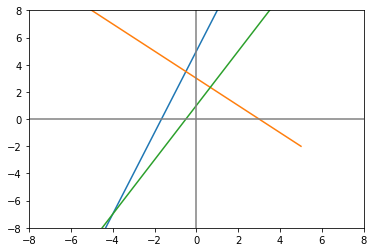

In [29]:
# Comencemos con 3 ecuaciones y 2 incognitas
# y =  3*x+5
# y = -1*x+3
# y =  2*x+1

x = np.arange(-6,6)
y_1 =  3*x+5
y_2 = -1*x+3
y_3 =  2*x+1

plt.figure()
plt.plot(x,y_1)
plt.plot(x,y_2)
plt.plot(x,y_3)

plt.xlim(-8,8)
plt.ylim(-8,8)

#dibujamos los ejes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()

Como podemos ver en el gráfico, ambas rectas se cruzan en la solución óptima, x1=375 y x2=250.

Con esto termino esta introducción al [Álgebra lineal](http://es.wikipedia.org/wiki/%C3%81lgebra_lineal) con [Python](http://python.org/).